In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost
import csv

In [ ]:
df=pd.read_csv('weather.csv')

In [ ]:
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
y = df['RainTomorrow']
x = df.drop('RainTomorrow',axis=1)

In [ ]:
n = x.columns

In [ ]:
sc = StandardScaler()
x = pd.DataFrame(x,columns=n)

In [ ]:
df.WindGustSpeed.replace(np.nan,df.WindGustSpeed.mean(),inplace=True)
df.WindSpeed9am.replace(np.nan,df.WindSpeed9am.mean(),inplace=True)
# Columns Include Categorial Data only
df.WindGustDir.replace(np.nan,"N/a",inplace=True)
df.WindDir9am.replace(np.nan,"N/a",inplace=True)
df.WindDir3pm.replace(np.nan,"N/a",inplace=True)
df.isna().sum()

Date              14358
Location          14435
MinTemp           15641
MaxTemp           15461
Rainfall          17003
Evaporation       59092
Sunshine          66379
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm      16540
Humidity9am       16521
Humidity3pm       16941
Pressure9am       25101
Pressure3pm       25052
Cloud9am          54527
Cloud3pm          55678
Temp9am           16005
Temp3pm           16482
RainToday         17003
RainTomorrow      17002
YEAR             110317
ANNUAL           110343
dtype: int64

In [ ]:
from sklearn import model_selection

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2,random_state =0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(91546, 24)
(91546,)
(22887, 24)
(22887,)


In [ ]:
print(x_train)

             Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2272   20-05-2015         Albury     10.3     17.6      12.8          NaN   
38435  19-06-2014     WaggaWagga      4.9     14.1       0.0          0.2   
68921  15-06-2013      Melbourne      9.7     14.8       NaN          1.2   
8909   28-01-2017          Cobar     24.4     41.0       0.0          NaN   
43712  10-03-2012     Wollongong     16.9     22.4       0.4          NaN   
...           ...            ...      ...      ...       ...          ...   
21243  05-05-2009  NorfolkIsland     16.0     20.4       0.0          6.4   
45891  31-08-2008       Canberra      6.1     17.2       4.0          2.2   
42613  05-02-2009     Wollongong     20.3     26.8       0.0          NaN   
43567  17-10-2011     Wollongong     12.0     16.7       0.8          NaN   
68268  04-07-2011      Melbourne     10.0     15.8       0.2          1.2   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
2

In [ ]:
def SLRegression_and_eval(df,feature1,feature2):
    X=df[feature1].values
    Y=df[feature2].values
    x_mean=X.mean()
    y_mean=Y.mean()

    
    a=sum([(xi-x_mean)*(yi-y_mean) for xi,yi in zip(X,Y)])/sum([(xi-x_mean)**2 for xi in X])
    b=y_mean-(a*x_mean)

    
    Y_pred=lambda x: a*x+b
  
    plt.scatter(X,Y,color="y");
    plt.plot([X.min(),X.max()],[Y_pred(X.min()),Y_pred(X.max())],color="purple")
    plt.scatter(x_mean,y_mean,color="blue",marker="s");
    
    RSS=sum([(yi-Y_pred(xi))**2 for xi,yi in zip(X,Y)])
    TSS=sum([(yi-y_mean)**2 for yi in Y])
    R2_score=1-(RSS/TSS)

    print("RSS{}\nTSS={}\nR2_score={}".format(RSS,TSS,R2_score))

RSSnan
TSS=nan
R2_score=nan


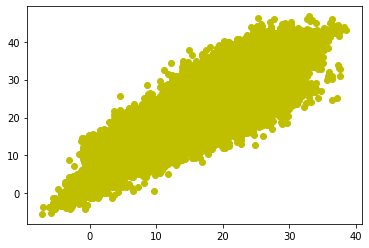

In [ ]:
SLRegression_and_eval(df,"Temp9am","Temp3pm")

RSSnan
TSS=nan
R2_score=nan


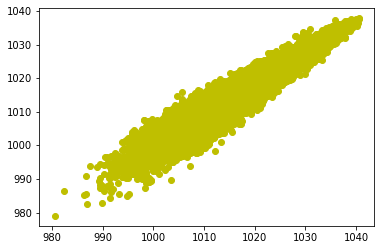

In [ ]:
SLRegression_and_eval(df,"Pressure9am","Pressure3pm")

RSSnan
TSS=nan
R2_score=nan


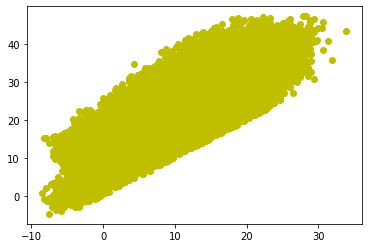

In [ ]:
SLRegression_and_eval(df,"MinTemp","MaxTemp")

RSSnan
TSS=nan
R2_score=nan


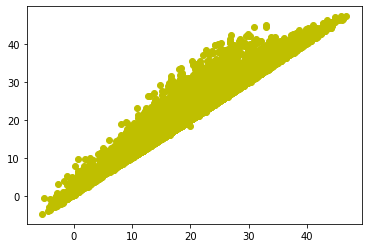

In [ ]:
SLRegression_and_eval(df,"Temp3pm","MaxTemp")

RSSnan
TSS=nan
R2_score=nan


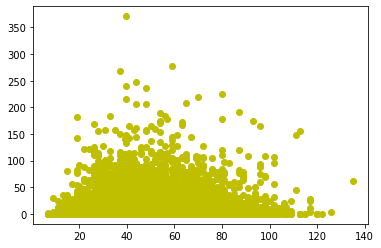

In [ ]:
SLRegression_and_eval(df,"WindGustSpeed","Rainfall")